In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
df = pd.read_csv('SBAnational.csv')

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [7]:
df.shape

(899164, 27)

In [8]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [ ]:
#Checking to see how many nulls are involved in this dataset so that I can remove them.

In [172]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [173]:
total = df.isnull().sum().sort_values(ascending=False)


percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
ChgOffDate,736465,0.819055
RevLineCr,4528,0.005036
LowDoc,2582,0.002872
DisbursementDate,2368,0.002634
MIS_Status,1997,0.002221
BankState,1566,0.001742
Bank,1559,0.001734
NewExist,136,0.000151
City,30,0.000033
State,14,0.000016


In [7]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
#Time to check that data types match the columns

In [ ]:
df.dtypes

In [ ]:
#Due to viewing the dataset, I know that DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, and SBA_Appv all have the '$' sign inside of the cell, therefore making them objects instead of floats. LowDoc and RevLineCr will need to be changed as well.

In [ ]:
#Removing markings that prevent .astype from changing these columns to float.

In [53]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

In [54]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].astype(float, errors='raise')

In [55]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
5,517000.0,0.0,0.0,517000.0,387750.0
7,45000.0,0.0,0.0,45000.0,36000.0
...,...,...,...,...,...
899145,25000.0,0.0,0.0,25000.0,12500.0
899146,189000.0,0.0,0.0,189000.0,189000.0
899157,200000.0,0.0,0.0,200000.0,150000.0
899160,85000.0,0.0,0.0,85000.0,42500.0


In [ ]:
#Check dtypes to make sure that this worked.

In [ ]:
df.dtypes

In [ ]:
#One of the most important columns is MIS_Status as this tells whether the account was Paid in Fill (PIF) or Charged Off(CHGOFF). This column will work better as 0, paid in full, or 1, charged off. In order to do this, I will create a new column and delete MIS_Status later when other columns are removed.

In [ ]:
df['MIS_Status']

In [8]:
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    730199
1    156041
Name: Default, dtype: int64

Text(0.95, 156042, '17.61%')

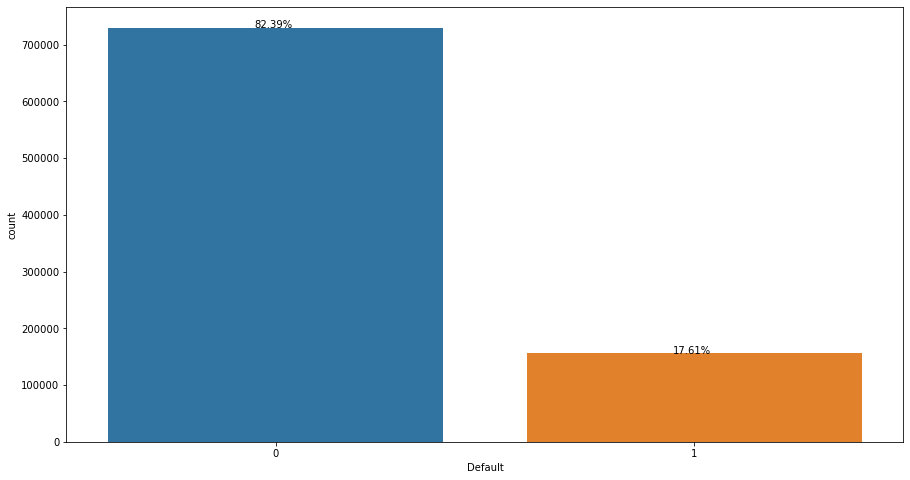

In [13]:
sns.countplot(df['Default'])

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df['Default'].value_counts()[0] + 1, s = str(round((df['Default'].value_counts()[0])*100/len(df['Default']),2)) + '%')
plt.text(x = 0.95, y = df['Default'].value_counts()[1] +1, s = str(round((df['Default'].value_counts()[1])*100/len(df['Default']),2)) + '%')


In [ ]:
#RevLineCr and LowDoc need to be changed to integers in order to be included in analysis.

In [9]:
df['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', '`', ',', '1', 'C', '3', '2', 'R', '7', 'A',
       '5', '.', '4', '-', 'Q'], dtype=object)

In [10]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [ ]:
#For this, Yes(Y)=1 No(N) = 0. 

In [11]:
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')]
df= df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

In [12]:
df['NewExist'].value_counts()



1.0    445070
2.0    165117
0.0       953
Name: NewExist, dtype: int64

In [184]:
(df['NewExist'].value_counts()/len(df))*100

1.0    72.826194
2.0    27.017868
0.0     0.155938
Name: NewExist, dtype: float64

In [13]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

In [14]:
df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

In [15]:
df.drop(columns=['NewExist','MIS_Status'],inplace=True)

In [16]:
#In the CreateJob column I will change it to categorcal
#if 0 then he doesn't create a job, if > 0 then he creates a job
df['CreateJob'] = np.where((df.CreateJob > 0 ),1,df.CreateJob)
df.rename(columns={"CreateJob": "Is_CreatedJob"}, inplace=True)
df.Is_CreatedJob.value_counts()

0    449318
1    160869
Name: Is_CreatedJob, dtype: int64

In [17]:
#Seeing the FranchiseCode column, based on the guidelines
# if the FranchiseCode column = 0 or = 1 then he doesn't have a franchise, otherwise he has a franchise
df['FranchiseCode'] = df['FranchiseCode'].replace(1,0 )	
df['FranchiseCode'] = np.where((df.FranchiseCode != 0 ),1,df.FranchiseCode)

df.rename(columns={"FranchiseCode": "Is_Franchised"}, inplace=True)
df.Is_Franchised.value_counts()

0    584502
1     25685
Name: Is_Franchised, dtype: int64

In [18]:
#Pad the RetainedJob column I will change it to categorcal
# if 0 then he has no permanent employees, then if > 0 then he has employees
df['RetainedJob'] = np.where((df.RetainedJob > 0 ),1,df.RetainedJob)
df.rename(columns={"RetainedJob": "Is_RetainedJob"}, inplace=True)
df.Is_RetainedJob.value_counts()

0    312855
1    297332
Name: Is_RetainedJob, dtype: int64

In [19]:
# Check the number of each data type in the field
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    527522
<class 'str'>     82665
Name: ApprovalFY, dtype: int64

In [20]:
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1976A', '1969', '1995', '1970', '2005',
       '1996', '1971', 1996, 1971], dtype=object)

In [ ]:
#We have a mixture of integers and strings here, with one record including an 'A' as well. I clean these next.

In [21]:
# Create a function to apply formatting to the records of str type only
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x


df['ApprovalFY'] = df['ApprovalFY'].apply(clean_str).astype('int64')

In [ ]:
#I am dropping Name, City, Zip, and Bank as these are private identifiers that are not necessary for this data analyzation. 

In [22]:
 df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'ChgOffDate'], inplace=True)


In [23]:
df.head()

,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,Is_CreatedJob,Is_RetainedJob,Is_Franchised,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Default,NewBusiness
0,IN,OH,451120,28-Feb-97,1997,84,4,0,0,0,0,0,1,28-Feb-99,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00",0,1.0
1,IN,IN,722410,28-Feb-97,1997,60,2,0,0,0,0,0,1,31-May-97,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00",0,1.0
2,IN,IN,621210,28-Feb-97,1997,180,7,0,0,0,0,0,0,31-Dec-97,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00",0,0.0
3,OK,OK,0,28-Feb-97,1997,60,2,0,0,0,0,0,1,30-Jun-97,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00",0,0.0
4,FL,FL,0,28-Feb-97,1997,240,14,1,1,0,0,0,0,14-May-97,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00",0,0.0


In [ ]:
#Next step is to do a correlation matrix to see what variables are highly correlated.

In [27]:
corr_map= df.corr(method='spearman')

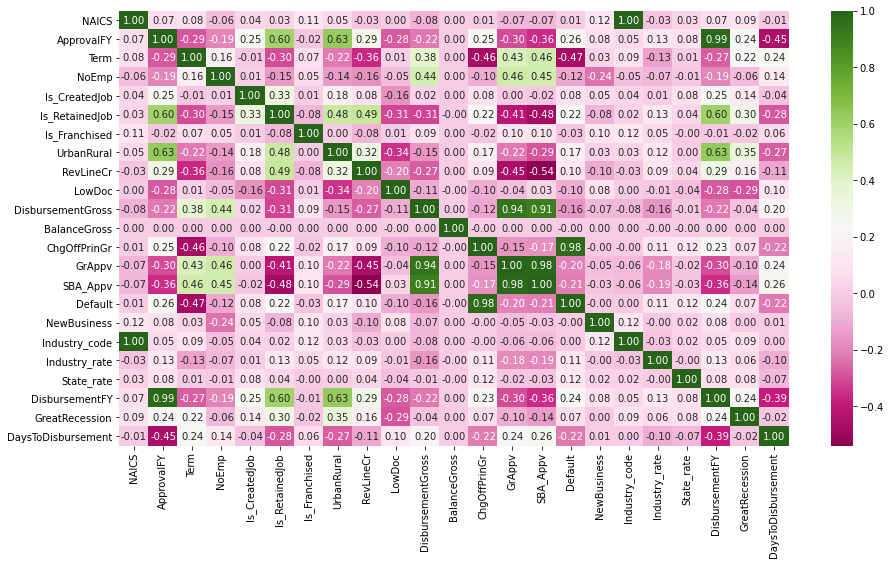

In [134]:
v = sns.heatmap(corr_map,annot=True, fmt = ".2f", cmap = "PiYG")

In [ ]:
#The highest correlation is with DisbursementGross and GrAppv which makes sense as it is likely that the amount a business is approved for will be the amount that is disbursed to them.
#Nothing else on this heatmap appears to have a significant correlation. 

In [ ]:
#For banks,  it is most important to know what State and what Industry is most likely to default on the loans given.  

In [ ]:
df['NAICS'].unique()

In [ ]:
(123456//10**((int(math.log(123456,10)) -1)))

In [ ]:
(10**math.log(1206,10)-1)

In [24]:
def get_code(industry_code):
    if industry_code <= 0:
        return 0
    return (industry_code // 10 ** (int(math.log(industry_code, 10)) - 1))

In [25]:
def Industry_name(i):
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance', 
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise', 
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 92:'Public Administration'
               }
    if i in def_code:
        return def_code[i]
    


In [26]:
def def_rate(i):
    Industry_default = {21:0.08, 11:0.09, 55:0.10, 
                      62: 0.10, 22:0.14, 
                      92:0.15,54:0.19, 
                      42:0.19,31:0.19,
                      32:0.16,33:0.14,
                      81:0.20,71:0.21,
                      72:0.22,44:0.22,
                      45:0.23,23:0.23,
                      56:0.24,61:0.24,
                      51:0.25,48:0.27,
                      49:0.23,52:0.28,53:0.29}
    if i in Industry_default:
        return Industry_default[i]
    return np.nan

In [27]:

df['Industry_code'] = df.NAICS.apply(get_code)


df['Industry_name'] = df.Industry_code.apply(Industry_name)


df['Industry_rate'] = df.NAICS.apply(get_code).apply(def_rate)

In [32]:
df[['Industry_code','Industry_name','Industry_rate']]

,Industry_code,Industry_name,Industry_rate
0,45,Retail Trade,0.23
1,72,Accomodation & Food Service,0.22
2,62,Health Care & Social Assistance,0.10
3,0,None,NaN
4,0,None,NaN
...,...,...,...
899158,0,None,NaN
899160,45,Retail Trade,0.23
899161,33,Manufacturing,0.14
899162,0,None,NaN


In [28]:
df.dropna(subset=['Industry_rate'],inplace=True)

In [29]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state

Default,0,1
State,,
AK,1006,97
AL,3299,816
AR,2519,534
AZ,5440,2504
CA,45091,16296
CO,7866,2381
CT,5503,1074
DC,592,158
DE,873,249


In [30]:
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])

In [31]:
def_state = def_state.drop(axis=1, columns=[0.0, 1.0]).round(1).to_dict()

In [32]:
def state_def_rate(i):
    def_state = {'AK': 0.1,'AL': 0.2, 'AR': 0.2, 'AZ': 0.2,'CA': 0.2, 'CO': 0.2, 'CT': 0.1, 'DC': 0.2,
                 'DE': 0.2, 'FL': 0.3, 'GA': 0.2, 'HI': 0.2, 'IA': 0.1, 'ID': 0.1, 'IL': 0.2, 'IN': 0.2, 
                 'KS': 0.1, 'KY': 0.2, 'LA': 0.2, 'MA': 0.1, 'MD': 0.2, 'ME': 0.1, 'MI': 0.2, 'MN': 0.1,
                 'MO': 0.2, 'MS': 0.2, 'MT': 0.1, 'NC': 0.2, 'ND': 0.1, 'NE': 0.1, 'NH': 0.1, 'NJ': 0.2,
                 'NM': 0.1, 'NV': 0.2, 'NY': 0.2, 'OH': 0.2, 'OK': 0.2, 'OR': 0.2, 'PA': 0.1, 'RI': 0.1,
                 'SC': 0.2, 'SD': 0.1, 'TN': 0.2, 'TX': 0.2, 'UT': 0.2, 'VA': 0.2, 'VT': 0.1, 'WA': 0.1,
                 'WI': 0.1, 'WV': 0.2, 'WY': 0.1}

    if i in def_state:
        return def_state[i]

In [33]:

df['State_rate'] = df.State.apply(state_def_rate)

In [ ]:
df['State_rate']

In [ ]:
#Check the new column to make sure there is appropriate labeling now. 

In [34]:
# Convert ApprovalDate and DisbursementDate columns to datetime values

df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [35]:
# Create DisbursementFY field for time selection criteria later
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [36]:
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) | 
                                     ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term']/12) >= 2007)), 1, 0)

In [37]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

# Change DaysToDisbursement from a timedelta64 dtype to an int64 dtype
# Converts series to str, removes all characters after the space before 'd' in days for each record, then changes the dtype to int
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [ ]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].values.astype(int)

In [43]:
df.dtypes

State                         object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
Is_CreatedJob                  int64
Is_RetainedJob                 int64
Is_Franchised                  int64
UrbanRural                     int64
RevLineCr                      int32
LowDoc                         int32
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
Default                        int32
NewBusiness                  float64
Industry_code                  int64
Industry_name                 object
Industry_rate                float64
State_rate                   float64
DisbursementFY                 int64
GreatRecession                 int32
D

In [44]:
df.isnull().sum()

State                 0
BankState             0
NAICS                 0
ApprovalDate          0
ApprovalFY            0
Term                  0
NoEmp                 0
Is_CreatedJob         0
Is_RetainedJob        0
Is_Franchised         0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementDate      0
DisbursementGross     0
BalanceGross          0
ChgOffPrinGr          0
GrAppv                0
SBA_Appv              0
Default               0
NewBusiness           0
Industry_code         0
Industry_name         0
Industry_rate         0
State_rate            0
DisbursementFY        0
GreatRecession        0
DaysToDisbursement    0
dtype: int64

In [ ]:
#Handling Outliers

<AxesSubplot:xlabel='DisbursementGross'>

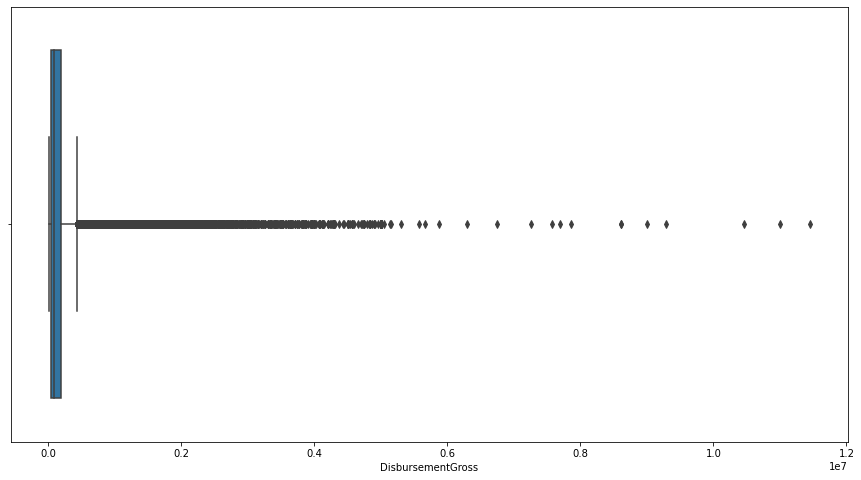

In [142]:
sns.boxplot(x=df['DisbursementGross'])

In [138]:
#if outliers are removed lot of data is being lost so we will apply transformations

df['DisbursementGross'] = np.log(df['DisbursementGross'])
df['DisbursementGross'].skew()

-0.09255480698901039

<AxesSubplot:xlabel='DisbursementGross'>

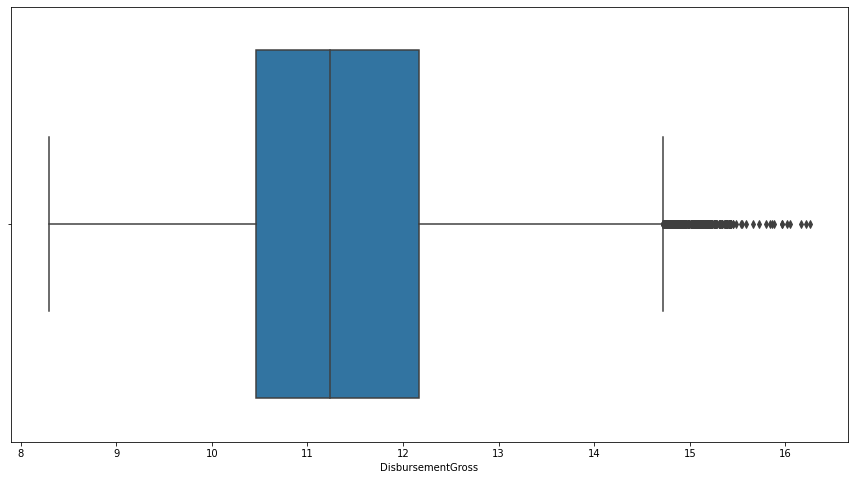

In [144]:
sns.boxplot(x=df['DisbursementGross'])

<AxesSubplot:xlabel='GrAppv'>

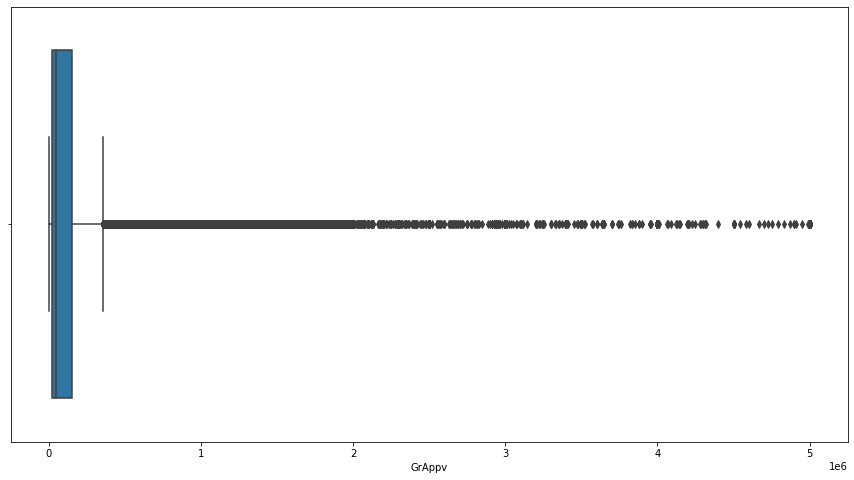

In [145]:
sns.boxplot(x=df['GrAppv'])

In [139]:
df['GrAppv'] = np.log(df['GrAppv'])
df['GrAppv'].skew()

0.012391390031821964

<AxesSubplot:xlabel='GrAppv'>

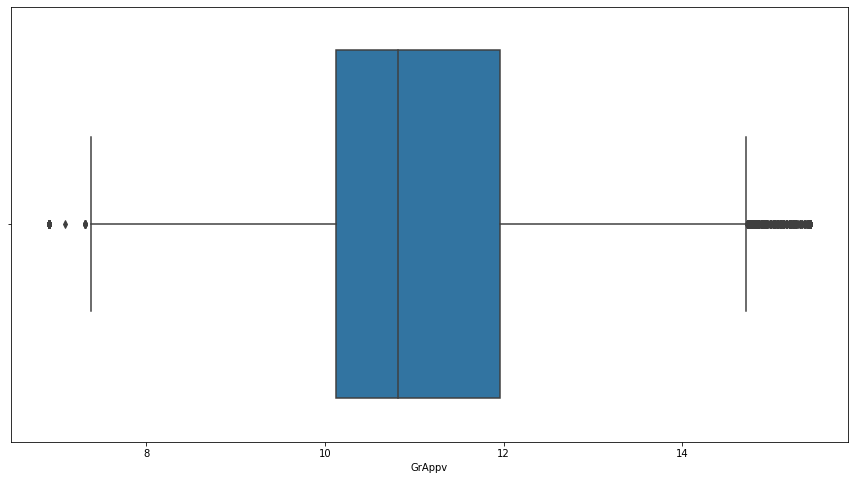

In [147]:
sns.boxplot(x=df['GrAppv'])

In [148]:
df['NoEmp'].nunique()

432

<AxesSubplot:xlabel='NoEmp'>

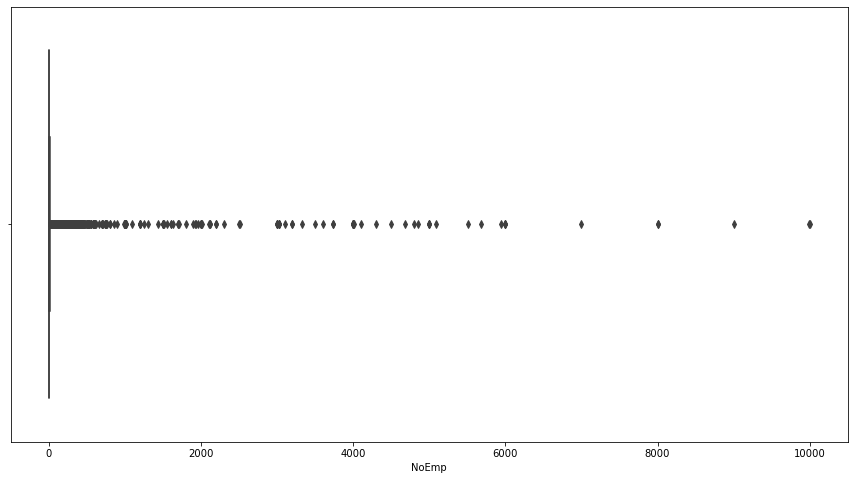

In [149]:
sns.boxplot(x=df['NoEmp'])

In [140]:
remove_emp = df[(df['NoEmp'] == 0)].index
df.drop(remove_emp, inplace=True)

In [141]:
df['NoEmp']= stats.boxcox(df['NoEmp'])[0]

In [152]:
df['NoEmp'].skew()

0.0702423262172598

<AxesSubplot:xlabel='NoEmp'>

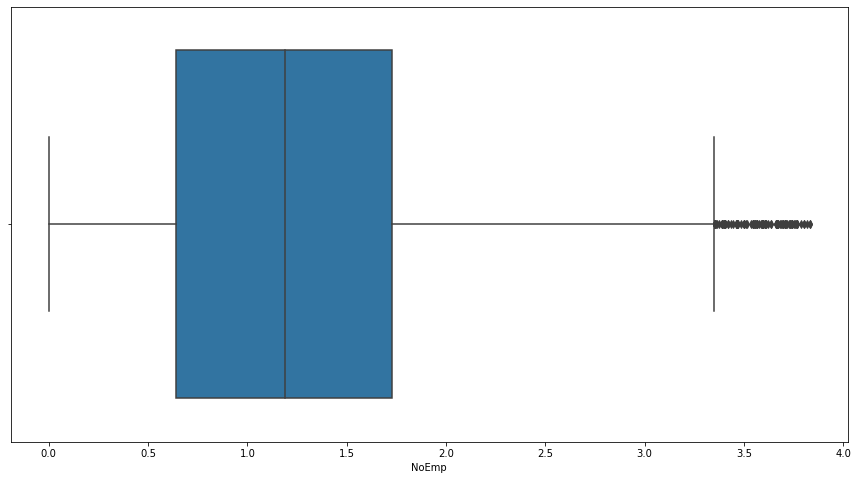

In [153]:
sns.boxplot(x=df['NoEmp'])

<AxesSubplot:xlabel='Term'>

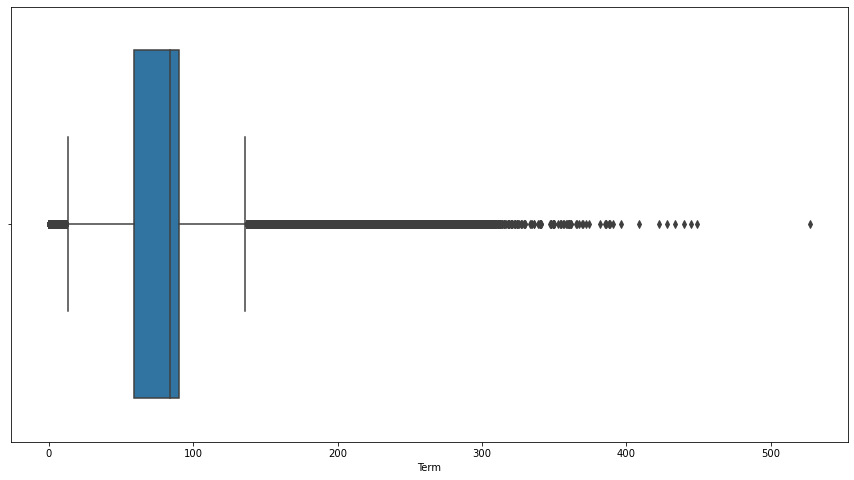

In [154]:
sns.boxplot(x=df['Term'])

In [135]:
df['Term'].describe()

count    456940.000000
mean         93.811706
std          68.362394
min           0.000000
25%          59.000000
50%          84.000000
75%          90.000000
max         527.000000
Name: Term, dtype: float64

In [ ]:
#Term is indicating that  the loan duration is min 0 months and max -43 years
#While the data collection we have is only from 1987–2010 (23 years),
# so a minimum of 5 years (75 months) or a maximum of 23 years (276 months)

In [136]:
remove_term1 = df[(df['Term'] < 75)].index
remove_term2 = df[(df['Term'] > 276)].index
df.drop(remove_term1, inplace=True)
df.drop(remove_term2, inplace=True)

In [137]:
df['Term'].describe()

count    259707.000000
mean        118.648704
std          56.890642
min          75.000000
25%          84.000000
50%          84.000000
75%         120.000000
max         276.000000
Name: Term, dtype: float64

In [50]:
df_num = df.select_dtypes(include=np.number)

In [51]:
df_cat = df.select_dtypes(include=object)

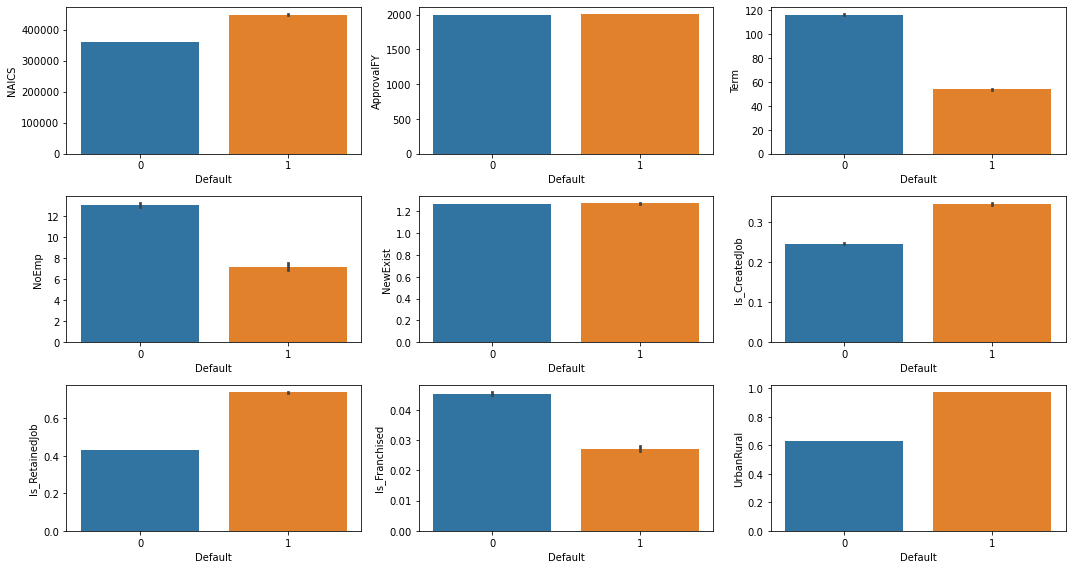

In [52]:
fig, ax= plt.subplots(3,3)

for c,subplot in zip(df_num.columns,ax.flatten()):
    sns.barplot(data=df_num, x= df['Default'], y=c, ax=subplot)
plt.tight_layout()
plt.show()

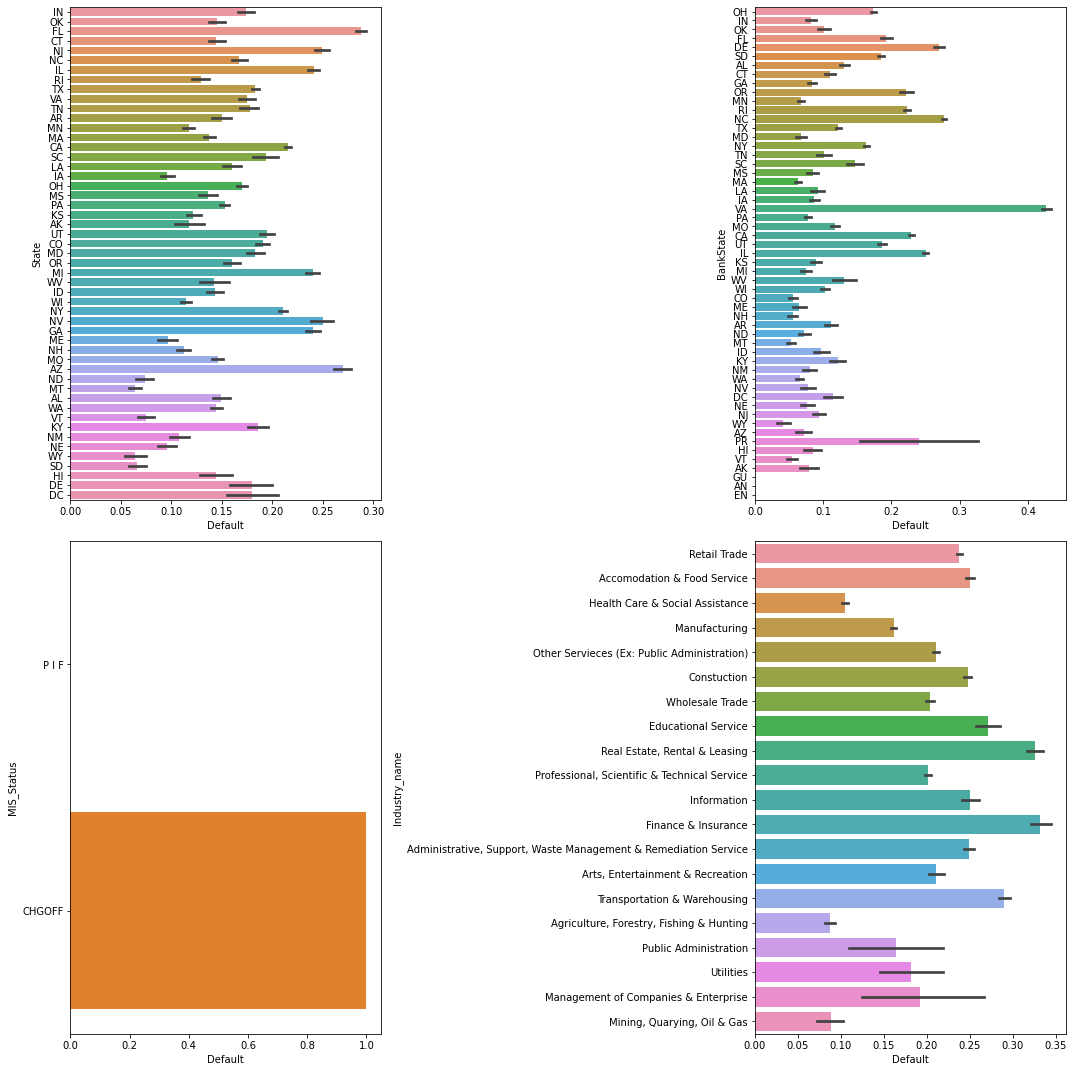

In [53]:
fig, ax= plt.subplots(2,2,figsize=(15, 15))

for c,subplot in zip(df_cat.columns,ax.flatten()):
    sns.barplot(data=df_cat, x= df['Default'], y=c, ax=subplot)
plt.tight_layout()
plt.show()

In [ ]:
#Here are two stacked bar charts created together, showing Loan Status v Industry and Loan Status v State. 
#It is important for banks to know what industry is more likely to default on a loan and in what states those businesses more likely to default.

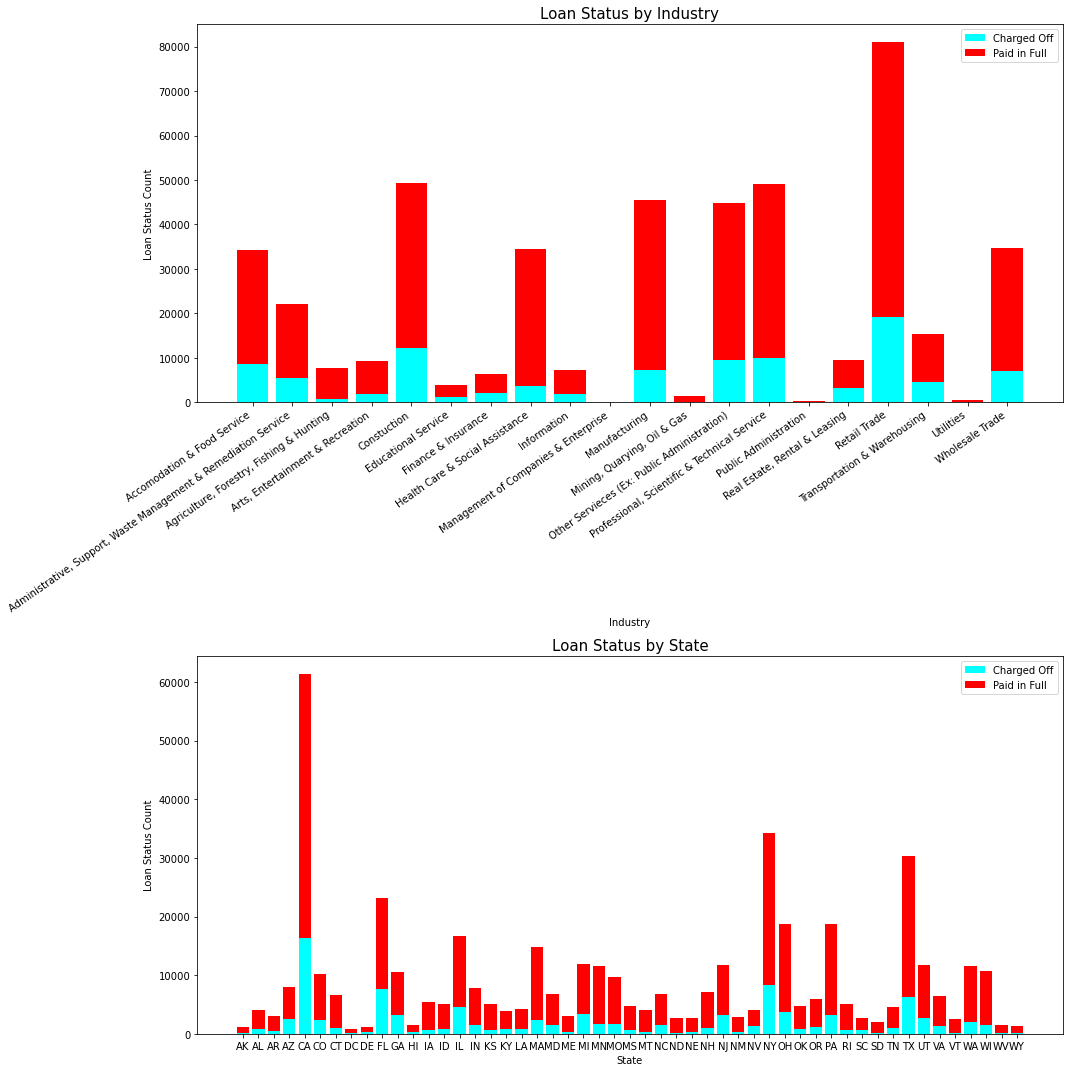

In [72]:
fig3 = plt.figure(figsize=(15, 15))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

def two_graphs(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], color='cyan', label='Charged Off')
    axes.bar(data.index, data[0], color='red', bottom=data[1], label='Paid in Full')


two_graphs(df=df, col='Industry_name', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry_name', 'Default'])['Industry_name'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Loan Status by Industry', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Loan Status Count')
ax1a.legend()

two_graphs(df=df, col='State', axes=ax2a)

ax2a.set_title('Loan Status by State', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Loan Status Count')
ax2a.legend()

plt.tight_layout()
plt.show()

In [ ]:
#These stacked barcharts are rather difficult to interpret due to the size of them. A table showing percentage of loans defaulted on may be easier to read.

In [54]:
per_st=df.groupby(['State', 'Default'])['State'].count().unstack('Default')
per_st['Percent']= per_st[1]/(per_st[1] + per_st[0])
per_st.sort_values(by='Percent', ascending=False)

Default,0,1,Percent
State,,,
FL,19853,8028,0.287938
AZ,7096,2621,0.269733
NV,3978,1326,0.250000
NJ,10553,3505,0.249324
IL,16265,5166,0.241053
GA,10879,3448,0.240664
MI,11148,3521,0.240030
CA,63395,17430,0.215651
NY,34241,9125,0.210418


In [ ]:
#According to this table, the state where the most defaulted loans are is Florida, followed by Arizona and Nevada. 
#Based on this, banks should be weary of loaning money to businesses in those states. 

In [57]:
per_in=df.groupby(['Industry_name', 'Default'])['Industry_name'].count().unstack('Default')
per_in['Percent']= per_in[1]/(per_in[1] + per_in[0])
per_in.sort_values(by='Percent', ascending=False)

Default,0,1,Percent
Industry_name,,,
Finance & Insurance,4232,2104,0.332071
"Real Estate, Rental & Leasing",6441,3112,0.325762
Transportation & Warehousing,10932,4472,0.290314
Educational Service,2918,1087,0.271411
Information,5509,1843,0.250680
Accomodation & Food Service,25701,8565,0.249956
"Administrative, Support, Waste Management & Remediation Service",16537,5475,0.248728
Constuction,37053,12185,0.247471
Retail Trade,61706,19246,0.237746


In [ ]:
#Finance loans are most likely to be defaulted on, followed by Real Estate and Transportation. Banks should be cautious when loaning to these industries.

<ipython-input-58-691f185ed8c3>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1a.set_xticklabels(df.groupby(['RevLineCr', 'Default'])['RevLineCr'].count().unstack('Default').index,


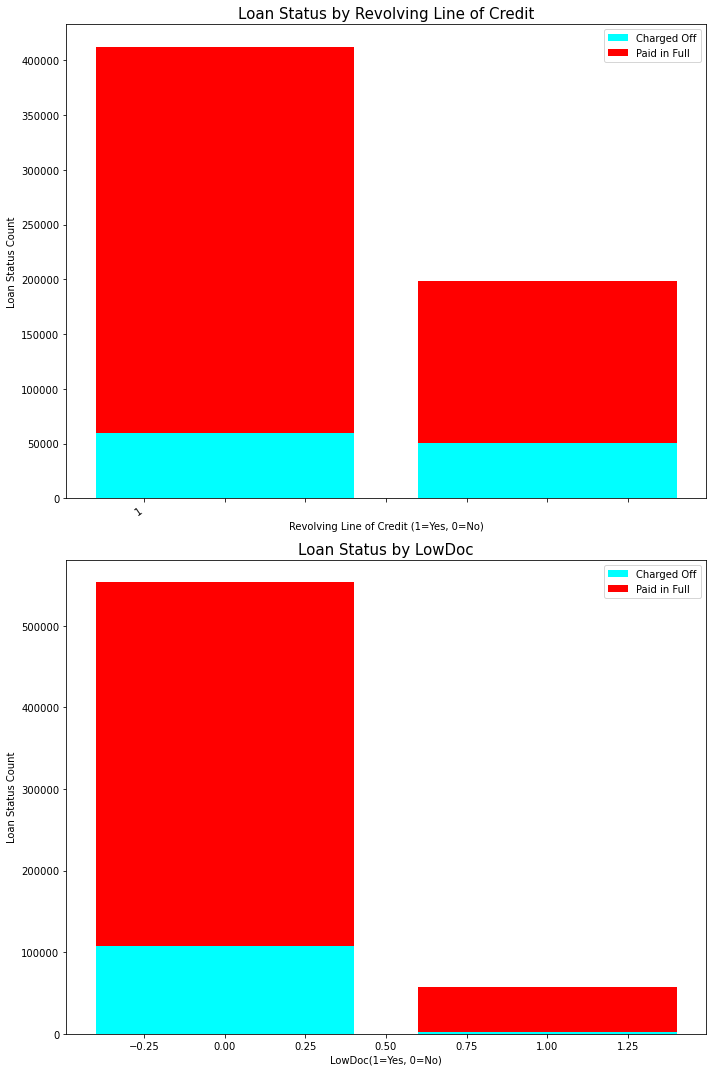

In [58]:
fig3 = plt.figure(figsize=(10, 15))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

def two_graphs(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], color='cyan', label='Charged Off')
    axes.bar(data.index, data[0], color='red', bottom=data[1], label='Paid in Full')


two_graphs(df=df, col='RevLineCr', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['RevLineCr', 'Default'])['RevLineCr'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Loan Status by Revolving Line of Credit', fontsize=15)
ax1a.set_xlabel('Revolving Line of Credit (1=Yes, 0=No)')
ax1a.set_ylabel('Loan Status Count')
ax1a.legend()

two_graphs(df=df, col='LowDoc', axes=ax2a)

ax2a.set_title('Loan Status by LowDoc', fontsize=15)
ax2a.set_xlabel('LowDoc(1=Yes, 0=No)')
ax2a.set_ylabel('Loan Status Count')
ax2a.legend()

plt.tight_layout()
plt.show()

In [59]:
per_rv=df.groupby(['RevLineCr', 'Default'])['RevLineCr'].count().unstack('Default')
per_rv['Percent']= per_rv[1]/(per_rv[1] + per_rv[0])
per_rv.sort_values(by='Percent', ascending=False)

Default,0,1,Percent
RevLineCr,,,
1,147350,50695,0.255977
0,352285,59857,0.145234


In [ ]:
#As shown, businesses that have a revolving line of credit are more likely to default. 

In [61]:
per_ld=df.groupby(['LowDoc', 'Default'])['LowDoc'].count().unstack('Default')
per_ld['Percent']= per_ld[1]/(per_ld[1] + per_ld[0])
per_ld.sort_values(by='Percent', ascending=False)

Default,0,1,Percent
LowDoc,,,
0,445238,107871,0.195027
1,54397,2681,0.046971


In [ ]:
#As shown, those who are not given LowDoc loans are more likely to default on loans. 

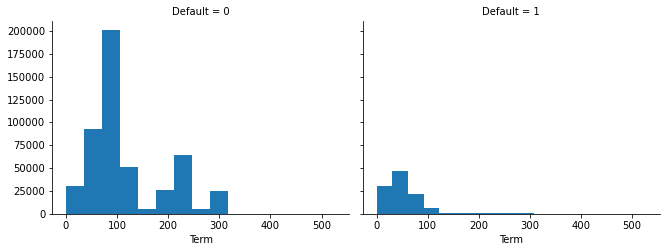

In [62]:
g = sns.FacetGrid(df, col='Default', height=3.6, aspect=1.3)
g.map(plt.hist, 'Term', alpha=1, bins=15)

In [39]:
df.shape

(456940, 28)

In [ ]:
df_full.shape

In [57]:
df_full = df.copy()

In [58]:
df_full.columns

Index(['State', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term',
       'NoEmp', 'Is_CreatedJob', 'Is_RetainedJob', 'Is_Franchised',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv', 'Default', 'NewBusiness', 'Industry_code', 'Industry_name',
       'Industry_rate', 'State_rate', 'DisbursementFY', 'GreatRecession',
       'DaysToDisbursement'],
      dtype='object')

In [59]:
df_full.drop(columns=['NAICS','ApprovalDate','BalanceGross',
                      'Industry_code','DisbursementDate'],inplace=True)

In [48]:
df_full.drop(['State_rate','Industry_rate'],axis=1,inplace=True)

In [60]:
df_full.drop(columns=['ChgOffPrinGr'],inplace=True)

In [50]:
df_full.dropna(subset=['Industry_name'],inplace=True)

In [43]:
df_full.drop(columns=['SBA_Appv'],inplace=True)

In [50]:
df_full.shape

(456940, 20)

In [61]:
df_full.dtypes

State                  object
BankState              object
ApprovalFY              int64
Term                    int64
NoEmp                   int64
Is_CreatedJob           int64
Is_RetainedJob          int64
Is_Franchised           int64
UrbanRural              int64
RevLineCr               int32
LowDoc                  int32
DisbursementGross     float64
GrAppv                float64
SBA_Appv              float64
Default                 int32
NewBusiness           float64
Industry_name          object
Industry_rate         float64
State_rate            float64
DisbursementFY          int64
GreatRecession          int32
DaysToDisbursement      int64
dtype: object

In [ ]:
df.drop(columns=[ 'NAICS', 'ApprovalDate', 'NewExist', 'Industry_name','LowDoc',
                 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status',], inplace=True)

In [55]:
df_full.isnull().sum()

State                 0
BankState             0
ApprovalFY            0
Term                  0
NoEmp                 0
Is_CreatedJob         0
Is_RetainedJob        0
Is_Franchised         0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
SBA_Appv              0
Default               0
NewBusiness           0
Industry_name         0
GreatRecession        0
DaysToDisbursement    0
dtype: int64

In [48]:
df_full.drop(columns=['BankState'],inplace=True)

# building full model 


In [62]:
#building full model 

df_full_model = pd.get_dummies(df_full)

df_full_model.head()

,ApprovalFY,Term,NoEmp,Is_CreatedJob,Is_RetainedJob,Is_Franchised,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,Default,NewBusiness,Industry_rate,State_rate,DisbursementFY,GreatRecession,DaysToDisbursement,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,BankState_AK,BankState_AL,BankState_AN,BankState_AR,BankState_AZ,BankState_CA,BankState_CO,BankState_CT,BankState_DC,BankState_DE,BankState_FL,BankState_GA,BankState_GU,BankState_HI,BankState_IA,BankState_ID,BankState_IL,BankState_IN,BankState_KS,BankState_KY,BankState_LA,BankState_MA,BankState_MD,BankState_ME,BankState_MI,BankState_MN,BankState_MO,BankState_MS,BankState_MT,BankState_NC,BankState_ND,BankState_NE,BankState_NH,BankState_NJ,BankState_NM,BankState_NV,BankState_NY,BankState_OH,BankState_OK,BankState_OR,BankState_PA,BankState_PR,BankState_RI,BankState_SC,BankState_SD,BankState_TN,BankState_TX,BankState_UT,BankState_VA,BankState_VT,BankState_WA,BankState_WI,BankState_WV,BankState_WY,Industry_name_Accomodation & Food Service,"Industry_name_Administrative, Support, Waste Management & Remediation Service","Industry_name_Agriculture, Forestry, Fishing & Hunting","Industry_name_Arts, Entertainment & Recreation",Industry_name_Constuction,Industry_name_Educational Service,Industry_name_Finance & Insurance,Industry_name_Health Care & Social Assistance,Industry_name_Information,Industry_name_Management of Companies & Enterprise,Industry_name_Manufacturing,"Industry_name_Mining, Quarying, Oil & Gas",Industry_name_Other Servieces (Ex: Public Administration),"Industry_name_Professional, Scientific & Technical Service",Industry_name_Public Administration,"Industry_name_Real Estate, Rental & Leasing",Industry_name_Retail Trade,Industry_name_Transportation & Warehousing,Industry_name_Utilities,Industry_name_Wholesale Trade
0,1997,84,4,0,0,0,0,0,1,60000.0,60000.0,48000.0,0,1.0,0.23,0.2,1999,0,730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,0,0,1,40000.0,40000.0,32000.0,0,1.0,0.22,0.2,1997,0,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,0,0,287000.0,287000.0,215250.0,0,0.0,0.10,0.2,1997,1,306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,0,0,517000.0,517000.0,387750.0,0,0.0,0.14,0.1,1997,1,122,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,0,0,1,45000.0,45000.0,36000.0,0,1.0,0.20,0.3,1998,0,487,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
df_full_model.shape

(456940, 140)

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [85]:
y=df_full_model['Default']

X=df_full_model.drop('Default',axis=1)

In [86]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27) 

In [87]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [88]:
X_train = scale.transform(X_train)

X_test = scale.transform(X_test)

In [89]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)



In [90]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [91]:
y_test_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[::,1]

print('Classification Report: \n', classification_report(y_test, y_test_pred, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.882     0.951     0.915    107779
           1      0.745     0.532     0.621     29303

    accuracy                          0.861    137082
   macro avg      0.814     0.741     0.768    137082
weighted avg      0.853     0.861     0.852    137082



In [92]:
Train_Score_full_model = cross_val_score(log_model,X_train,y_train,cv=5,scoring="f1")
round(Train_Score_full_model.mean(),2)

0.62

In [93]:
Test_Score_full_model =cross_val_score(log_model,X_test,y_test,cv=5,scoring="f1")

round(Test_Score_full_model.mean(),2)

0.62

In [67]:
from sklearn.metrics import plot_roc_curve

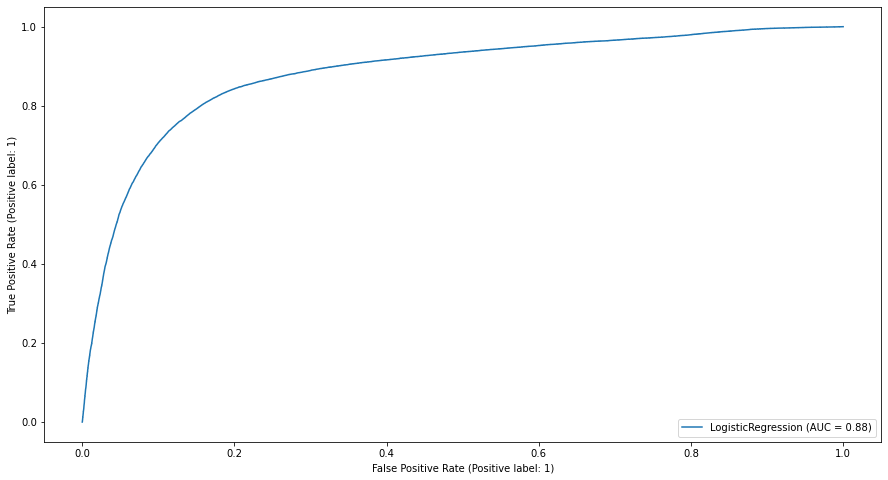

In [70]:
plot_roc_curve(log_model,X_test,y_test)

In [168]:
df.drop(columns=[ 'NAICS', 'ApprovalDate', 'Industry_name',
                 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv'], inplace=True)

In [169]:
df.dropna(subset=['Industry_rate'],inplace=True)

In [170]:
df.drop(columns=['State','BankState'],inplace=True)

In [171]:
df.drop(columns=['Industry_code'],inplace=True)

In [172]:
df.isnull().sum()

ApprovalFY            0
Term                  0
NoEmp                 0
Is_CreatedJob         0
Is_RetainedJob        0
Is_Franchised         0
UrbanRural            0
RevLineCr             0
LowDoc                0
DisbursementGross     0
GrAppv                0
Default               0
NewBusiness           0
Industry_rate         0
State_rate            0
DisbursementFY        0
GreatRecession        0
DaysToDisbursement    0
dtype: int64

In [ ]:
df.dtypes

In [89]:
df.isnull().sum()

ApprovalFY            0
Term                  0
NoEmp                 0
Is_CreatedJob         0
Is_RetainedJob        0
Is_Franchised         0
UrbanRural            0
RevLineCr             0
DisbursementGross     0
GrAppv                0
Default               0
NewBusiness           0
Industry_rate         0
State_rate            0
DisbursementFY        0
GreatRecession        0
DaysToDisbursement    0
dtype: int64

In [ ]:
df = pd.Dataframe({'Logistic Regression'})

In [ ]:
df.drop(columns=['State','BankState','NAICS','NewExist','ChgOffPrinGr','Industry_code',
                'Industry_name'],inplace=True)

In [ ]:
df.dropna(subset=['Industry_rate'],inplace=True)

In [ ]:
df.drop(columns=['MIS_Status'],inplace=True)

# Feature Selection Techniques 

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [149]:
X = df_full_model.drop('Default',axis=1)
y = df_full_model['Default']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3)

In [95]:
select_feat = SelectKBest(score_func=f_classif ,k=10)

select_feat.fit(X_train,y_train)

SelectKBest()

In [96]:
feat_importances = pd.Series(select_feat.scores_ ,index=X_train.columns)

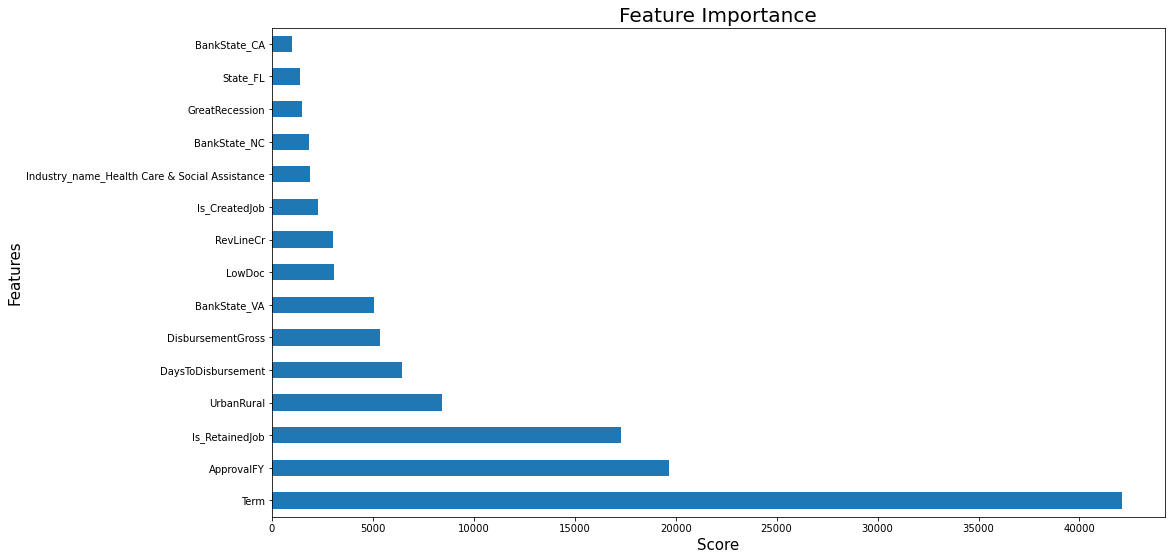

In [97]:

f, ax = plt.subplots(figsize=(16,9))
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

In [198]:
feat_importances.nlargest(15)

Term                                             42119.739819
ApprovalFY                                       19685.011041
Is_RetainedJob                                   17268.503868
UrbanRural                                        8427.273138
DaysToDisbursement                                6456.656235
DisbursementGross                                 5362.807460
BankState_VA                                      5074.179216
LowDoc                                            3054.429924
RevLineCr                                         3045.464419
Is_CreatedJob                                     2303.192719
Industry_name_Health Care & Social Assistance     1884.400387
BankState_NC                                      1833.363672
GreatRecession                                    1508.978324
State_FL                                          1369.274292
BankState_CA                                       971.989314
dtype: float64

In [305]:
df

,ApprovalFY,Term,NoEmp,Is_CreatedJob,Is_RetainedJob,Is_Franchised,UrbanRural,RevLineCr,DisbursementGross,GrAppv,Default,NewBusiness,Industry_rate,State_rate,DisbursementFY,GreatRecession,DaysToDisbursement
0,1997,84,4,0,0,0,0,0,60000.0,60000.0,0,1.0,0.23,0.2,1999,0,730
1,1997,60,2,0,0,0,0,0,40000.0,40000.0,0,1.0,0.22,0.2,1997,0,92
2,1997,180,7,0,0,0,0,0,287000.0,287000.0,0,0.0,0.10,0.2,1997,1,306
5,1997,120,19,0,0,0,0,0,517000.0,517000.0,0,0.0,0.14,0.1,1997,1,122
7,1997,84,1,0,0,0,0,0,45000.0,45000.0,0,1.0,0.20,0.3,1998,0,487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,1997,60,5,0,0,0,0,1,25000.0,25000.0,0,0.0,0.23,0.2,1997,0,32
899146,1997,240,8,1,0,0,0,0,189000.0,189000.0,0,0.0,0.16,0.2,1997,1,167
899157,1997,36,40,0,0,0,0,0,200000.0,200000.0,0,0.0,0.19,0.2,1997,0,32
899160,1997,60,6,0,0,0,0,1,85000.0,85000.0,0,0.0,0.23,0.2,1997,0,246


In [199]:
feat_importances.nlargest(15)

Term                                             42119.739819
ApprovalFY                                       19685.011041
Is_RetainedJob                                   17268.503868
UrbanRural                                        8427.273138
DaysToDisbursement                                6456.656235
DisbursementGross                                 5362.807460
BankState_VA                                      5074.179216
LowDoc                                            3054.429924
RevLineCr                                         3045.464419
Is_CreatedJob                                     2303.192719
Industry_name_Health Care & Social Assistance     1884.400387
BankState_NC                                      1833.363672
GreatRecession                                    1508.978324
State_FL                                          1369.274292
BankState_CA                                       971.989314
dtype: float64

In [200]:
df_feature_Select = df_full_model[['Term','ApprovalFY','Is_RetainedJob','UrbanRural','DaysToDisbursement','DisbursementGross',
                       'BankState_VA','RevLineCr','LowDoc','Is_CreatedJob',
                                   'Industry_name_Health Care & Social Assistance','BankState_NC',
                                   'GreatRecession','State_FL','BankState_CA','Default']]

In [126]:
from sklearn.feature_selection import mutual_info_classif

In [127]:

mutual_info = mutual_info_classif(X_train,y_train)

In [128]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Term                             0.324054
ApprovalFY                       0.081008
UrbanRural                       0.056621
Is_RetainedJob                   0.044084
DisbursementGross                0.032431
                                   ...   
BankState_OK                     0.000000
BankState_OR                     0.000000
State_NY                         0.000000
BankState_RI                     0.000000
Industry_name_Wholesale Trade    0.000000
Length: 138, dtype: float64

<AxesSubplot:>

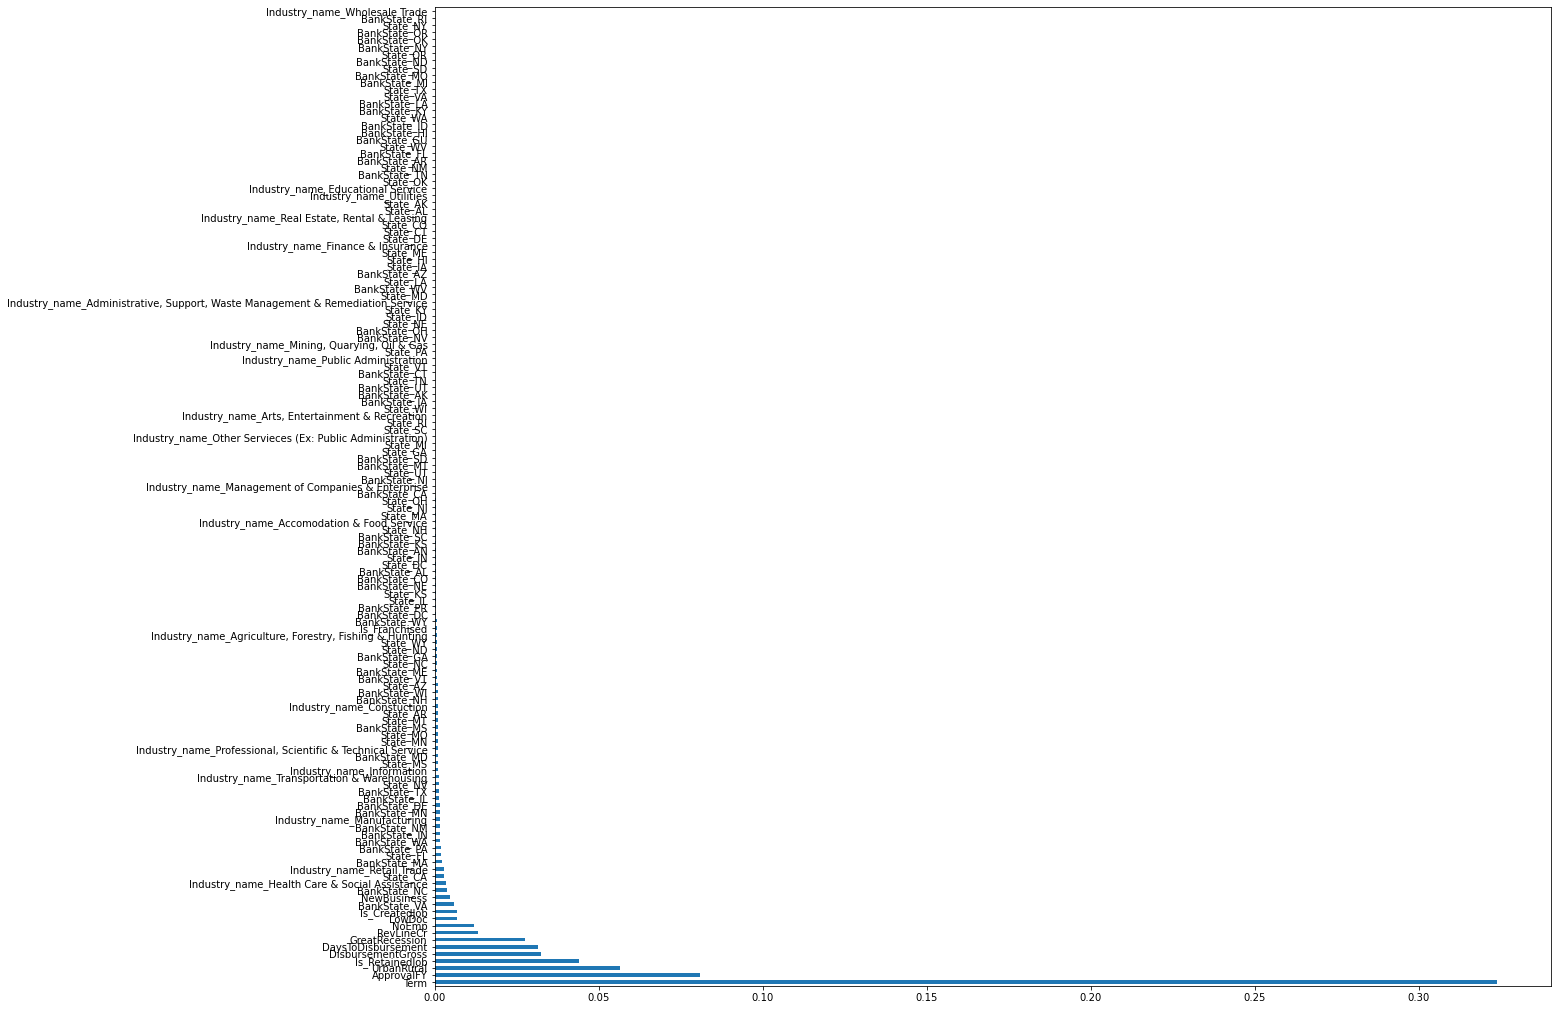

In [131]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.barh(figsize=(20, 18))

In [178]:
mutual_info.nlargest(15)

Term                                             0.324054
ApprovalFY                                       0.081008
UrbanRural                                       0.056621
Is_RetainedJob                                   0.044084
DisbursementGross                                0.032431
DaysToDisbursement                               0.031414
GreatRecession                                   0.027527
RevLineCr                                        0.013171
NoEmp                                            0.012117
LowDoc                                           0.006987
Is_CreatedJob                                    0.006937
BankState_VA                                     0.005794
NewBusiness                                      0.004816
BankState_NC                                     0.003887
Industry_name_Health Care & Social Assistance    0.003626
dtype: float64

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [232]:
y = df_feature_Select['Default']
X = df_feature_Select.drop(columns=['Default'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27) 

In [233]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [234]:
X_train = scale.transform(X_train)

X_test = scale.transform(X_test)

In [205]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [206]:
y_test_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[::,1]

print('Classification Report: \n', classification_report(y_test, y_test_pred, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.868     0.951     0.907    107779
           1      0.721     0.469     0.568     29303

    accuracy                          0.848    137082
   macro avg      0.794     0.710     0.738    137082
weighted avg      0.837     0.848     0.835    137082



In [110]:
confusion_matrix(y_test,y_test_pred)

array([[101843,   5936],
       [ 18074,  11229]], dtype=int64)

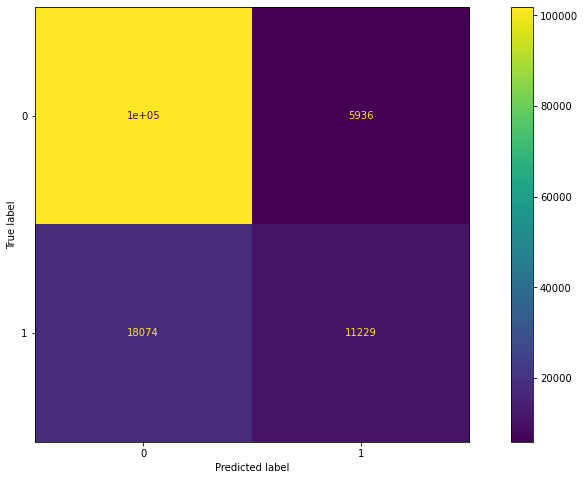

In [111]:
plot_confusion_matrix(log_reg,X_test,y_test)
plt.show()

In [207]:
Train_Score_fs_model = cross_val_score(log_reg,X_train,y_train,cv=5,scoring="f1")

round(Train_Score_fs_model.mean(),2)

0.57

In [208]:
Test_Score_fs_model=cross_val_score(log_reg,X_test,y_test,cv=5,scoring="f1")
round(Test_Score_fs_model.mean(),2)

0.56

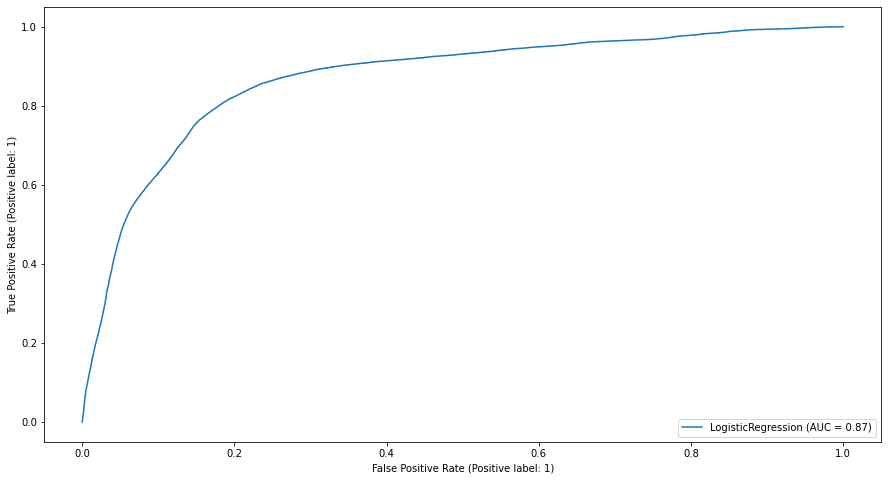

In [210]:
plot_roc_curve(log_reg,X_test,y_test)

In [209]:
mutual_info.nlargest(15)

Term                                             0.324054
ApprovalFY                                       0.081008
UrbanRural                                       0.056621
Is_RetainedJob                                   0.044084
DisbursementGross                                0.032431
DaysToDisbursement                               0.031414
GreatRecession                                   0.027527
RevLineCr                                        0.013171
NoEmp                                            0.012117
LowDoc                                           0.006987
Is_CreatedJob                                    0.006937
BankState_VA                                     0.005794
NewBusiness                                      0.004816
BankState_NC                                     0.003887
Industry_name_Health Care & Social Assistance    0.003626
dtype: float64

In [211]:
df_mutual_feat = df_full_model[['ApprovalFY', 'Term', 'NoEmp',  'Is_RetainedJob',
        'UrbanRural', 'RevLineCr', 'DisbursementGross','LowDoc','BankState_VA','Industry_name_Health Care & Social Assistance',
         'NewBusiness','BankState_NC',
        'GreatRecession', 'DaysToDisbursement','Default']]

In [222]:
y = df_mutual_feat['Default']
X = df_mutual_feat.drop(columns=['Default'], axis=1)

X_train_mutual, X_test_mutual, y_train_mutual, y_test_mutual = train_test_split(X, y, test_size=0.30, random_state=27)

In [223]:
scale = StandardScaler()
scale.fit(X_train_mutual)

StandardScaler()

In [224]:
X_train_mutual = scale.transform(X_train_mutual)

X_test_mutual = scale.transform(X_test_mutual)

In [225]:
log_reg_mutual = LogisticRegression(solver='lbfgs', max_iter=1000)

log_reg_mutual.fit(X_train_mutual,y_train_mutual)

LogisticRegression(max_iter=1000)

In [226]:
y_test_pred = log_reg_mutual.predict(X_test_mutual)
y_pred_proba = log_reg_mutual.predict_proba(X_test_mutual)[::,1]

print('Classification Report: \n', classification_report(y_test, y_test_pred, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.865     0.949     0.905    107779
           1      0.708     0.456     0.555     29303

    accuracy                          0.844    137082
   macro avg      0.787     0.703     0.730    137082
weighted avg      0.832     0.844     0.830    137082



In [227]:
Train_Score_fs_model2 = cross_val_score(log_reg_mutual,X_train_mutual,y_train_mutual,cv=5,scoring="f1")

round(Train_Score_fs_model2.mean(),2)

0.56

In [228]:
Test_Score_fs_model2 = cross_val_score(log_reg_mutual,X_test_mutual,y_test_mutual,cv=5,scoring="f1")

round(Test_Score_fs_model2.mean(),2)

0.55

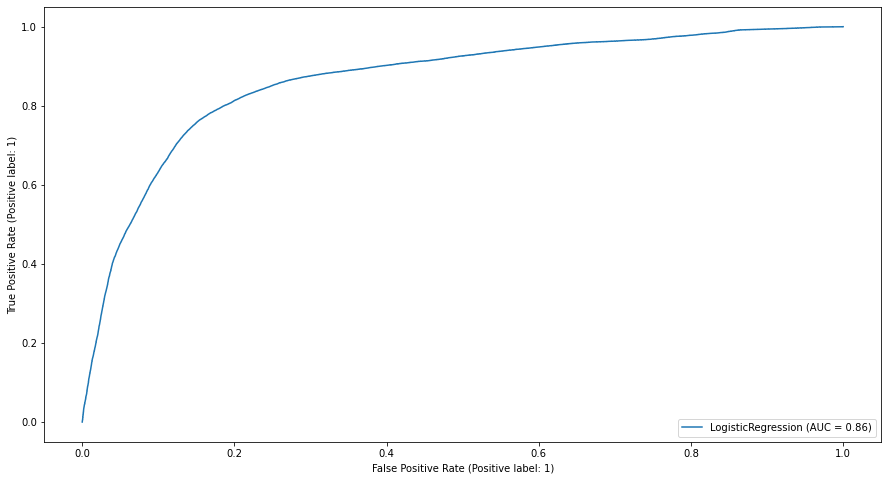

In [230]:
plot_roc_curve(log_reg_mutual,X_test_mutual,y_test_mutual)

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
kn = KNeighborsClassifier()

kn.fit(X_train,y_train)

y_kn_pred = kn.predict(X_test)

In [237]:
print(classification_report(y_test, y_kn_pred, digits=3))

              precision    recall  f1-score   support

           0      0.933     0.955     0.944    107779
           1      0.820     0.747     0.782     29303

    accuracy                          0.911    137082
   macro avg      0.876     0.851     0.863    137082
weighted avg      0.909     0.911     0.909    137082



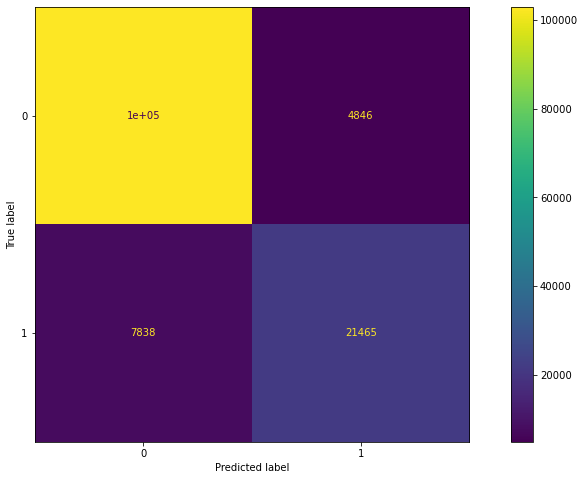

In [118]:
plot_confusion_matrix(kn,X_test,y_test)
plt.show()

In [119]:
cross_val_score(kn,X_train,y_train,cv=5,scoring="f1")



array([0.77165655, 0.76995413, 0.76943134, 0.77101913, 0.76697696])

In [120]:
cross_val_score(kn,X_test,y_test,cv=5,scoring="f1")

array([0.7451476 , 0.73205698, 0.75628454, 0.75406578, 0.74810811])

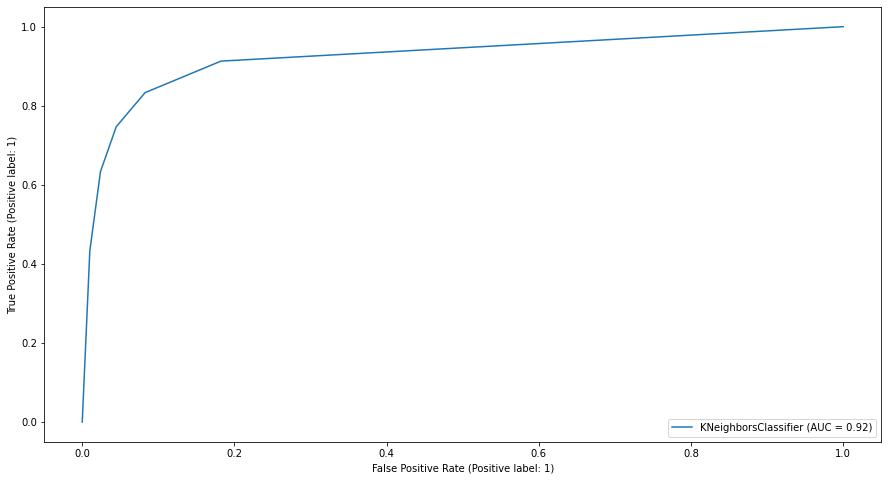

In [238]:
plot_roc_curve(kn,X_test,y_test)

In [ ]:
from sklearn.svm import SVC

In [356]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

In [124]:
y__svc_pred = svc.predict(X_test)

# Print the results
print(classification_report(y_test, y__svc_pred, digits=3))

              precision    recall  f1-score   support

           0      0.910     0.939     0.924    107779
           1      0.745     0.656     0.698     29303

    accuracy                          0.879    137082
   macro avg      0.827     0.798     0.811    137082
weighted avg      0.874     0.879     0.876    137082



In [44]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
rf = RandomForestClassifier()

# Train the model and make predictions
rf.fit(X_train, y_train)
y_logpred = rf.predict(X_test)

# Print the results
print(classification_report(y_test, y_logpred, digits=3))

              precision    recall  f1-score   support

           0      0.956     0.971     0.963    107779
           1      0.886     0.836     0.860     29303

    accuracy                          0.942    137082
   macro avg      0.921     0.903     0.912    137082
weighted avg      0.941     0.942     0.941    137082



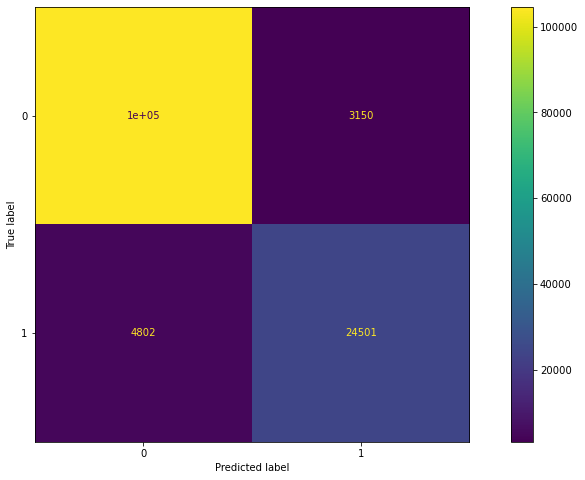

In [242]:
plot_confusion_matrix(rf,X_test,y_test)
plt.show()

In [243]:
rf_cross_train = cross_val_score(rf,X_train,y_train,cv=5,scoring="f1")

In [244]:
print("Train set Cross val Score Random Forest : ", round(rf_cross_train.mean(),2))

Train set Cross val Score Random Forest :  0.86


In [245]:
rf_cross_test = cross_val_score(rf,X_test,y_test,cv=5,scoring="f1")

In [246]:
print("Train set Cross val Score Random Forest : ", round(rf_cross_test.mean(),2))

Train set Cross val Score Random Forest :  0.85


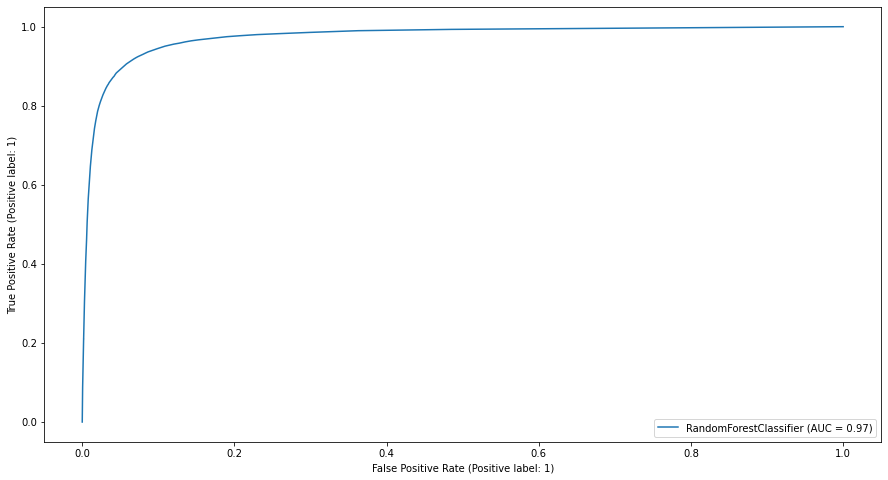

In [247]:
plot_roc_curve(rf,X_test,y_test)

In [155]:
rf = RandomForestClassifier()

# Train the model and make predictions
rf.fit(X_train_mutual, y_train_mutual)
y_logpred = rf.predict(X_test_mutual)

# Print the results
print(classification_report(y_test, y_logpred, digits=3))

              precision    recall  f1-score   support

           0      0.956     0.970     0.963    107779
           1      0.884     0.838     0.860     29303

    accuracy                          0.942    137082
   macro avg      0.920     0.904     0.912    137082
weighted avg      0.941     0.942     0.941    137082



In [156]:
rf_cross_train_mut = cross_val_score(rf,X_train_mutual,y_train_mutual,cv=5,scoring="f1")

In [157]:
print("Train set Cross val Score Random Forest : ", round(rf_cross_train_mut.mean(),2))

Train set Cross val Score Random Forest :  0.86


In [159]:
rf_cross_test_mut = cross_val_score(rf,X_test_mutual,y_test_mutual,cv=5,scoring="f1")

In [160]:
print("Train set Cross val Score Random Forest : ", round(rf_cross_test_mut.mean(),2))

Train set Cross val Score Random Forest :  0.85


In [168]:
from xgboost import XGBClassifier

In [175]:
Xgb = XGBClassifier()
Xgb.fit(X_train, y_train)
y_logpred = Xgb.predict(X_test)

# Print the results
print(classification_report(y_test, y_logpred, digits=3))

[10:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0      0.964     0.968     0.966    107779
           1      0.881     0.869     0.875     29303

    accuracy                          0.947    137082
   macro avg      0.923     0.918     0.920    137082
weighted avg      0.947     0.947     0.947    137082



In [348]:
y_probas = Xgb.predict_proba(X_test)

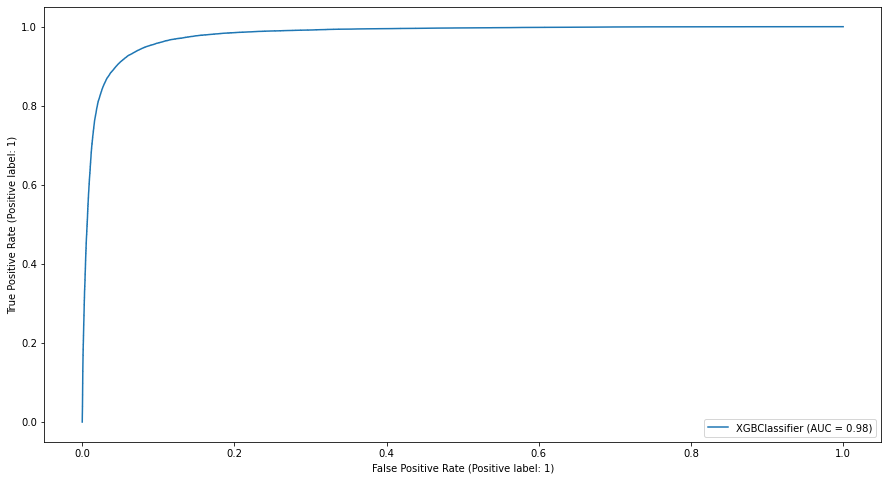

In [353]:
plot_roc_curve(Xgb,X_test,y_test)

In [339]:
xgb_cross_train = cross_val_score(Xgb,X_train,y_train,cv=5,scoring="f1")

[20:26:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [341]:
print("Train set Cross val Score XGB : ", round(xgb_cross_train.mean(),2))

Train set Cross val Score XGB :  0.88


In [ ]:
plot_roc_curve(Xgb,X,y_test)

In [342]:
xgb_cross_test = cross_val_score(Xgb,X_test,y_test,cv=5,scoring="f1")

[20:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [343]:
print("Test set Cross val Score XGB : ", round(xgb_cross_test.mean(),2))

Test set Cross val Score XGB :  0.87


In [176]:
Xgb_mut = XGBClassifier()
Xgb_mut.fit(X_train_mutual, y_train_mutual)
y_logpred = Xgb_mut.predict(X_test_mutual)

# Print the results
print(classification_report(y_test, y_logpred, digits=3))

[10:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0      0.964     0.968     0.966    107779
           1      0.879     0.866     0.873     29303

    accuracy                          0.946    137082
   macro avg      0.921     0.917     0.919    137082
weighted avg      0.946     0.946     0.946    137082



In [177]:
xgb_cross_train_mut = cross_val_score(Xgb_mut,X_train_mutual,y_train_mutual,cv=5,scoring="f1")

[10:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [171]:
print("Train set Cross val Score XGB : ", round(xgb_cross_train_mut.mean(),2))

Train set Cross val Score XGB :  0.87


In [172]:
xgb_cross_test_mut = cross_val_score(Xgb_mut,X_test_mutual,y_test_mutual,cv=5,scoring="f1")

[10:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [173]:
print("Test set Cross val Score XGB : ", round(xgb_cross_test_mut.mean(),2))

Test set Cross val Score XGB :  0.87


In [194]:
param = {'max_depth': [10,15,20], 
         'n_estimators':[50, 100, 150, 200], 
          'max_features': ['auto', 'sqrt'],
          'criterion' : ['gini', 'entropy'],}

In [185]:
import random

In [249]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param,  n_jobs=-1,
n_iter =15, cv=5)
rnd_search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 100, 150, 200]})

In [250]:
rnd_search.best_params_


{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'gini'}

In [251]:
y_logpred = rnd_search.predict(X_test)

# Print the results
print(classification_report(y_test, y_logpred, digits=3))

              precision    recall  f1-score   support

           0      0.957     0.969     0.963    107779
           1      0.881     0.841     0.861     29303

    accuracy                          0.942    137082
   macro avg      0.919     0.905     0.912    137082
weighted avg      0.941     0.942     0.941    137082



In [ ]:
rndsearch_cross_train = cross_val_score(rnd_search,X_train,y_train,cv=5,scoring="f1")

In [ ]:
rndsearch_cross_test = cross_val_score(rnd_search,X_test,y_test,cv=5,scoring="f1")

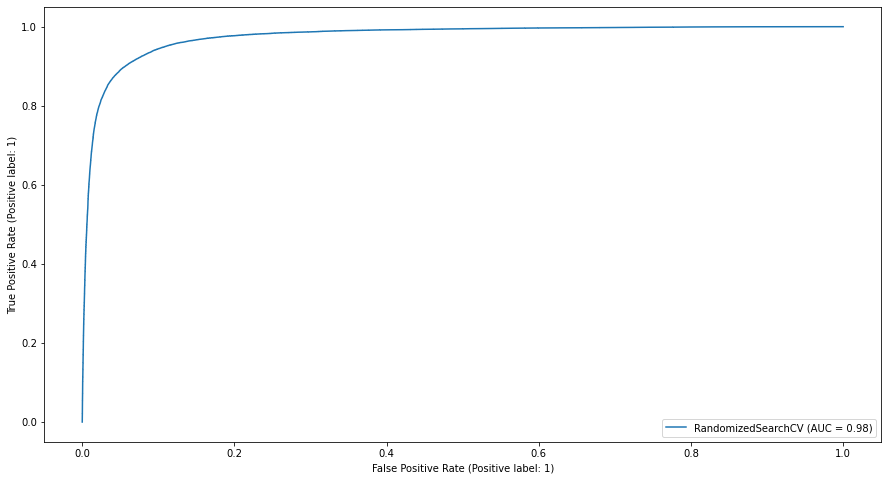

In [252]:
plot_roc_curve(rnd_search,X_test,y_test)

In [65]:
#Building Full Model Using Ensemble technique
from sklearn.model_selection import train_test_split

In [63]:
y=df_full_model['Default']

X=df_full_model.drop('Default',axis=1)

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27) 

In [69]:
rf = RandomForestClassifier()

# Train the model and make predictions
rf.fit(X_train, y_train)
y_logpred = rf.predict(X_test)

# Print the results
print(classification_report(y_test, y_logpred, digits=3))

              precision    recall  f1-score   support

           0      0.950     0.980     0.964    107779
           1      0.915     0.809     0.859     29303

    accuracy                          0.943    137082
   macro avg      0.932     0.894     0.912    137082
weighted avg      0.942     0.943     0.942    137082



It looks like reducing the number of features, and thereby dimensionality of the data, didn't affect the results too drastically. In fact, this model would likely perform better in a real world test because it is far more generalized. 


Conclusion :
    
The variables that are relevant or have an effect on the target are:

Term  - 
ApprovalFY  -                                     
UrbanRural                                       
Is_RetainedJob                                   
DisbursementGross                                
DaysToDisbursement                               
GreatRecession                                   
RevLineCr                                        
NoEmp                                            
LowDoc     

The best model is XGBoost with Micro Average PR AUC 98.9%, Recall 85.1%, Precission 81% .
We werunable to do paramter tuning because computer's capabilities are limited.

We did hyper paramter tuning for Random Forest using Randomized SearchCv and the hyper paramters retrieved are as follows:
    {'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'gini'}
    
As we can see, this model provides average ROC AUC of 0.97, which is close to 1 and, thus, efficient to detect potentially risky loan applications. To improve the baseline solution, we can:

1. dive deeper into the problem and create new informative features;
2. hyperparamter tuning under domain expertise.
3. apply more sophisticated methods, such as boosting or deep learning;

